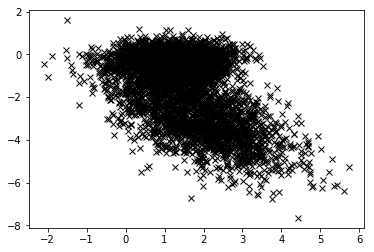

In [2]:
import numpy as np
from matplotlib import pyplot as plt

data = np.loadtxt('/home/kirilman/Projects/nir/ARHMM/pyhsmm/examples/example-data.txt')
plt.plot(data[:,0],data[:,1],'kx')

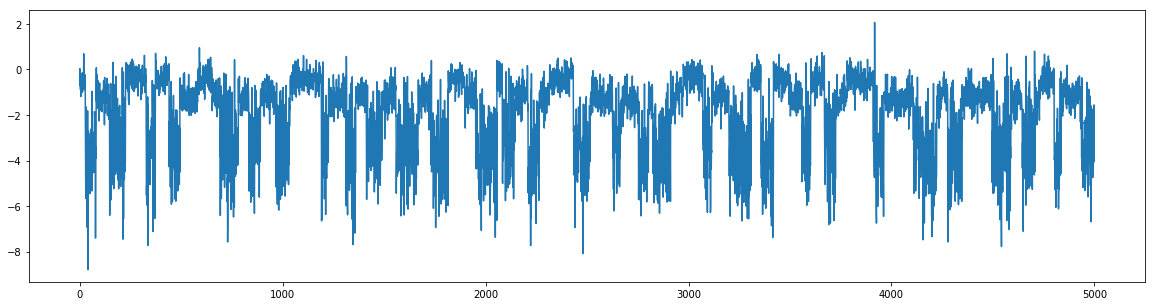

In [4]:
from pyhsmm.util.plot import pca_project_data
fig = plt.figure(figsize=(20,5))
plt.plot(pca_project_data(data,1))

In [5]:
import pyhsmm
import pyhsmm.basic.distributions as distributions

obs_dim = 2
Nmax = 25

obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.3,
                'nu_0':obs_dim+5}
dur_hypparams = {'alpha_0':2*30,
                 'beta_0':2}

obs_distns = [distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [distributions.PoissonDuration(**dur_hypparams) for state in range(Nmax)]
data = data[:1000]
posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
        alpha=6.,gamma=6., # better to sample over these; see concentration-resampling.py
        init_state_concentration=6., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns)
posteriormodel.add_data(data,trunc=60)


Конструктор


In [24]:
models = []
from pyhsmm.util.text import progprint_xrange

for idx in progprint_xrange(150):
    posteriormodel.resample_model()

/home/kirilman/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:899: RuntimeWarning: divide by zero encountered in log
  return log(self._sf(x, *args))


.........................  [  25/150,    0.56sec avg, ETA 01:10 ]
.........................  [  50/150,    0.55sec avg, ETA 55.48 ]
.........................  [  75/150,    0.55sec avg, ETA 40.90 ]
.........................  [ 100/150,    0.54sec avg, ETA 27.01 ]
.........................  [ 125/150,    0.54sec avg, ETA 13.42 ]
.........................  [ 150/150,    0.54sec avg, ETA 0.00 ]

   0.54sec avg, 01:20 total



In [29]:
posteriormodel.states_list

/home/kirilman/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

<Figure size 432x288 with 0 Axes>

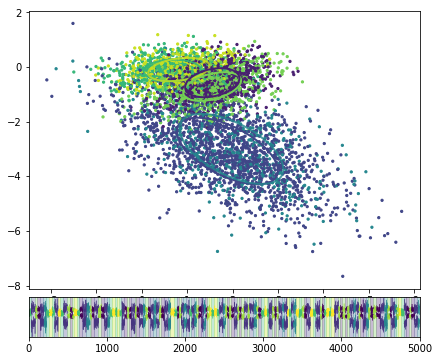

In [15]:
fig = plt.figure()

posteriormodel.plot()